In [7]:
from tensorflow.random import set_seed
from matplotlib import pyplot as plt
import numpy as np
import os
os.chdir('/home/fabricio/Documentos/universidad/cv/insulators-cv/')

np.random.seed(42)
set_seed(42)

## 1.- Carga de datos
se preprocesan y se cargan automáticamente

In [2]:
from src.utils import load_data
import numpy as np

img_data, label_data = load_data()
images = np.array(img_data)
images = images/255
labels = np.array(label_data)

Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...


In [3]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

idx = shuffle_along_axis(np.arange(600), 0)

### 1.1.- Conjuntos de datos

In [10]:
N_VALIDATION = 108
N_TRAIN = 432
N_TEST = 60

X_train = images[idx[:N_TRAIN]]
y_train = labels[idx[:N_TRAIN]]

X_val = images[idx[N_TRAIN:N_TRAIN+N_VALIDATION]]
y_val = labels[idx[N_TRAIN:N_TRAIN+N_VALIDATION]]

X_test = images[idx[N_TRAIN+N_VALIDATION:]]
y_test = labels[idx[N_TRAIN+N_VALIDATION:]]


## 2.- Construyendo modelo

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
classifier = Sequential()
classifier.add(Dense(units = 25, activation = "softsign", input_shape = (634014,)))
classifier.add(Dense(units = 6, activation = 'softmax'))
classifier.compile(optimizer = 'nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### 2.1.- Entrenando modelo

In [12]:
classifier.fit(x=X_train, y=y_train, epochs=200, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
14/14 [==============================] - 3s 165ms/step - loss: 2.6950 - accuracy: 0.2454 - val_loss: 1.5067 - val_accuracy: 0.3889
Epoch 2/100
14/14 [==============================] - 2s 142ms/step - loss: 1.2468 - accuracy: 0.5417 - val_loss: 1.2176 - val_accuracy: 0.5556
Epoch 3/100
14/14 [==============================] - 2s 138ms/step - loss: 0.9596 - accuracy: 0.6644 - val_loss: 1.0578 - val_accuracy: 0.5463
Epoch 4/100
14/14 [==============================] - 2s 139ms/step - loss: 0.7743 - accuracy: 0.7778 - val_loss: 1.0535 - val_accuracy: 0.5741
Epoch 5/100
14/14 [==============================] - 2s 138ms/step - loss: 0.6454 - accuracy: 0.8125 - val_loss: 0.9482 - val_accuracy: 0.6296
Epoch 6/100
14/14 [==============================] - 2s 134ms/step - loss: 0.6419 - accuracy: 0.8657 - val_loss: 1.0325 - val_accuracy: 0.5926
Epoch 7/100
14/14 [==============================] - 2s 135ms/step - loss: 0.5525 - accuracy: 0.8681 - val_loss: 0.8816 - val_accuracy: 0.6852

Epoch 58/100
14/14 [==============================] - 2s 136ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.4075 - val_accuracy: 0.8426
Epoch 59/100
14/14 [==============================] - 2s 138ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.3806 - val_accuracy: 0.8704
Epoch 60/100
14/14 [==============================] - 2s 139ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.4150 - val_accuracy: 0.8611
Epoch 61/100
14/14 [==============================] - 2s 141ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.8519
Epoch 62/100
14/14 [==============================] - 2s 140ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.4103 - val_accuracy: 0.8611
Epoch 63/100
14/14 [==============================] - 2s 134ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.3918 - val_accuracy: 0.8611
Epoch 64/100
14/14 [==============================] - 2s 145ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.3953 - val_accuracy:

### 2.2.- Visualizando resultados

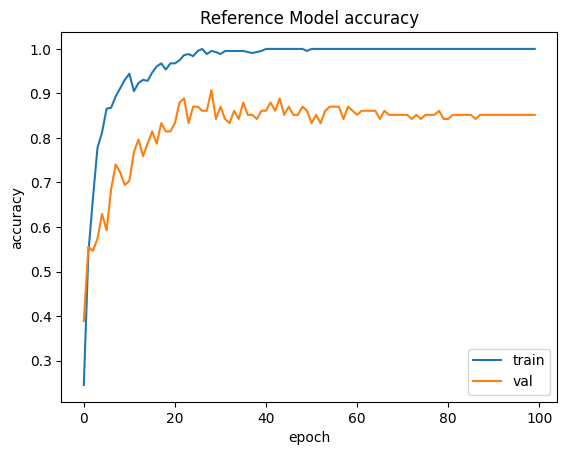

In [13]:
history = classifier.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Reference Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('reference_model_200ep_acc.png')
plt.show()

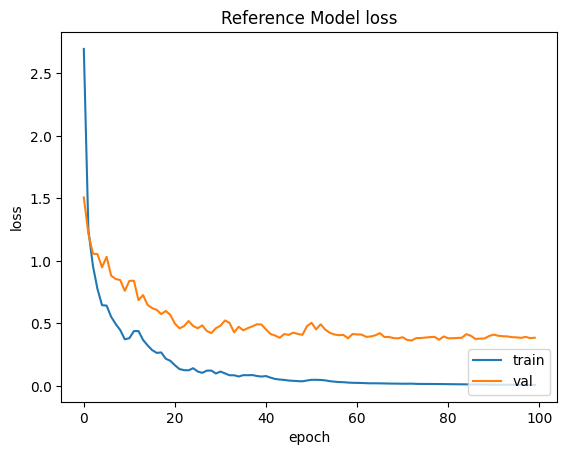

In [14]:
from matplotlib import pyplot as plt
history = classifier.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Reference Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('reference_model_200ep_loss.png')
plt.show()

### 2.3.- Evaluando con conjunto de test

In [15]:
classifier.evaluate(X_test,y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.2699 - accuracy: 0.9500


[0.26985451579093933, 0.949999988079071]